# 다변수의 time series LSTM 예측-(1)Market

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [2]:
from encodings import euc_kr
m=pd.read_csv('2019빅데이터페스티벌데이터/market_noDram_final.csv',encoding='euc_kr')
k=pd.read_csv('2019빅데이터페스티벌데이터/KOSPI_국면분석.csv', encoding='euc_kr')

In [3]:
kospi_after_5 = k['지수종가'].shift(-5)
k['kospi_after_5']=kospi_after_5
k2=k[['날짜','kospi_after_5']]

In [4]:
m_m=pd.merge(left=k2, right=m,how='left', on=['날짜'])
m_m

,날짜,kospi_after_5,A등급 구리(현물),니켈(현물),알루미늄 99.7%(현물),금괴(일간),미국1년,미국3년,미국10년,국고채권(1년),국고채권(3년),국고채권(10년),브랜트유 가격,원유 WTI
0,2001-01-02,589.92,1746.3,6935.0,1552.5,270.6,5.20,4.80,4.9,6.7,6.7,7.2,24.3,27.20
1,2001-01-03,560.81,1716.8,6370.0,1515.5,267.5,5.10,4.90,5.2,6.6,6.6,7.2,25.0,28.00
2,2001-01-04,561.79,1750.5,6569.0,1519.0,267.7,4.90,4.80,5.0,6.4,6.4,6.9,25.4,28.10
3,2001-01-05,587.87,1740.3,6607.0,1527.5,268.2,4.60,4.60,4.9,6.2,6.2,6.7,25.2,28.00
4,2001-01-08,599.00,1775.0,6734.0,1578.0,268.3,4.60,4.60,4.9,6.1,6.1,6.6,24.4,27.30
5,2001-01-09,603.42,1783.3,6796.0,1572.3,267.4,4.70,4.70,5.0,6.1,6.1,6.7,24.6,27.60
6,2001-01-10,595.83,1779.8,6947.0,1591.0,266.3,4.90,4.80,5.1,6.1,6.1,6.7,25.3,29.50
7,2001-01-11,604.05,1795.0,7140.0,1597.5,263.9,4.90,4.80,5.1,6.0,6.0,6.6,25.6,29.40
8,2001-01-12,619.78,1807.5,7325.0,1632.5,264.3,5.00,4.90,5.2,6.0,6.0,6.6,25.8,30.10
9,2001-01-15,627.45,1800.8,7145.0,1626.0,263.6,5.18,5.05,5.2,6.0,6.0,6.6,26.2,30.36


In [123]:
#STL 분해 해보려고 함
import statsmodels.api as sm

m_m['날짜'] = pd.to_datetime(m_m['날짜'])
m3 = m_m.set_index('날짜')
m3.drop(['level_0', 'index'], axis=1)
m4=m3.iloc[:3962,:]
s=sm.tsa.seasonal_decompose(m4.kospi_after_5)
#<statsmodels.tsa.seasonal.DecomposeResult object at 0x110ec3710>

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [5]:
m2=m_m.drop('날짜', axis=1)

In [6]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(m2) #값을 0~1로 떨어뜨린다

In [7]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = DataFrame(data)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
      cols.append(df.shift(i))
      names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
      cols.append(df.shift(-i))
      if i == 0:
          names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
      else:
          names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
      agg.dropna(inplace=True)
  return agg

In [8]:
reframed = series_to_supervised(scaled, 1, 1) #t-1시점,t시점 데이터를 한 행으로 둔다 

In [86]:
values = reframed.values
n_train = 3962 
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, 1:], train[:, 0]
test_X, test_y = test[:, 1:], test[:, 0]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [52]:
#train[:,1:]
scaled[:,0]

array([0.05689786, 0.04322753, 0.04368775, ...,        nan,        nan,
              nan])

In [35]:
from tensorflow import keras
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

Instructions for updating:
Colocations handled automatically by placer.


In [87]:
model = Sequential()
model.add(LSTM(30, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [33]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [88]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, 
        validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 3962 samples, validate on 481 samples
Epoch 1/50
 - 4s - loss: 0.0955 - val_loss: 0.1404
Epoch 2/50
 - 0s - loss: 0.2378 - val_loss: 0.1536
Epoch 3/50
 - 0s - loss: 0.1328 - val_loss: 0.4038
Epoch 4/50
 - 0s - loss: 0.1460 - val_loss: 0.2863
Epoch 5/50
 - 1s - loss: 0.0766 - val_loss: 0.2336
Epoch 6/50
 - 0s - loss: 0.0692 - val_loss: 0.2256
Epoch 7/50
 - 0s - loss: 0.0672 - val_loss: 0.1954
Epoch 8/50
 - 0s - loss: 0.0667 - val_loss: 0.1950
Epoch 9/50
 - 0s - loss: 0.0645 - val_loss: 0.1754
Epoch 10/50
 - 0s - loss: 0.0585 - val_loss: 0.1451
Epoch 11/50
 - 0s - loss: 0.0575 - val_loss: 0.1286
Epoch 12/50
 - 0s - loss: 0.0552 - val_loss: 0.1049
Epoch 13/50
 - 0s - loss: 0.0524 - val_loss: 0.0898
Epoch 14/50
 - 0s - loss: 0.0485 - val_loss: 0.0748
Epoch 15/50
 - 0s - loss: 0.0463 - val_loss: 0.0691
Epoch 16/50
 - 0s - loss: 0.0447 - val_loss: 0.0664
Epoch 17/50
 - 0s - loss: 0.0423 - val_loss: 0.0660
Epoch 18/50
 - 0s - loss: 0.0395 - val_loss: 0.0644
Epoch 19/50
 - 1s - loss: 

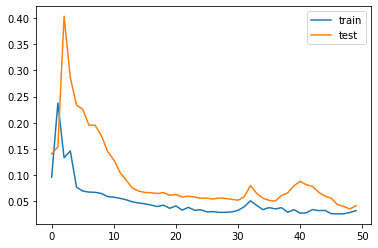

In [89]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from keras.layers import concatenate
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [102]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))

ValueError: Layer concatenate_10 was called with an input that isn't a symbolic tensor. Received type: <class 'tuple'>. Full input: [(array([[0.7570466 ],
       [0.7682475 ],
       [0.7762338 ],
       [0.77217567],
       [0.7674738 ],
       [0.76899123],
       [0.7722814 ],
       [0.77488005],
       [0.7766211 ],
       [0.7775085 ],
       [0.77784705],
       [0.7725867 ],
       [0.7738311 ],
       [0.7684125 ],
       [0.77673686],
       [0.7752683 ],
       [0.77895474],
       [0.7782291 ],
       [0.7765517 ],
       [0.776726  ],
       [0.7762456 ],
       [0.7770226 ],
       [0.7781091 ],
       [0.7771394 ],
       [0.7824124 ],
       [0.78234065],
       [0.78467107],
       [0.7862673 ],
       [0.789443  ],
       [0.79018676],
       [0.7917814 ],
       [0.78898954],
       [0.7860291 ],
       [0.7881701 ],
       [0.79067934],
       [0.7832844 ],
       [0.78240407],
       [0.78532517],
       [0.78723836],
       [0.78132427],
       [0.7797041 ],
       [0.7837982 ],
       [0.78420436],
       [0.77672017],
       [0.7793063 ],
       [0.7810577 ],
       [0.77905595],
       [0.78529227],
       [0.78571105],
       [0.79057133],
       [0.793965  ],
       [0.7901119 ],
       [0.7909374 ],
       [0.7891859 ],
       [0.78872967],
       [0.78789616],
       [0.7899612 ],
       [0.78932214],
       [0.7919693 ],
       [0.791167  ],
       [0.79034007],
       [0.78320825],
       [0.78254616],
       [0.7874644 ],
       [0.7934761 ],
       [0.78571224],
       [0.7872106 ],
       [0.7910187 ],
       [0.7902682 ],
       [0.79329324],
       [0.7968813 ],
       [0.7982702 ],
       [0.80499744],
       [0.8033354 ],
       [0.8039007 ],
       [0.80226207],
       [0.80207837],
       [0.8084837 ],
       [0.8224803 ],
       [0.81501925],
       [0.8221921 ],
       [0.81922114],
       [0.81298375],
       [0.80998564],
       [0.8093419 ],
       [0.8088542 ],
       [0.8118384 ],
       [0.8160949 ],
       [0.8189951 ],
       [0.8239467 ],
       [0.83098197],
       [0.83568037],
       [0.836825  ],
       [0.83579254],
       [0.8355942 ],
       [0.83058393],
       [0.83941376],
       [0.8385371 ],
       [0.8370849 ],
       [0.83566105],
       [0.8409225 ],
       [0.836465  ],
       [0.8402904 ],
       [0.8395959 ],
       [0.83738565],
       [0.838886  ],
       [0.84180415],
       [0.8389294 ],
       [0.8357254 ],
       [0.8359002 ],
       [0.83832765],
       [0.8395175 ],
       [0.83958673],
       [0.83714855],
       [0.8428633 ],
       [0.8448764 ],
       [0.84568   ],
       [0.84120154],
       [0.84519494],
       [0.8432025 ],
       [0.8426851 ],
       [0.84299064],
       [0.84595966],
       [0.84089243],
       [0.842183  ],
       [0.8408035 ],
       [0.8430146 ],
       [0.8450413 ],
       [0.84954906],
       [0.853243  ],
       [0.8588675 ],
       [0.85840833],
       [0.8565979 ],
       [0.8573557 ],
       [0.8604164 ],
       [0.8518915 ],
       [0.8518443 ],
       [0.8620368 ],
       [0.86885643],
       [0.86125565],
       [0.8672925 ],
       [0.86987746],
       [0.86779857],
       [0.8602145 ],
       [0.8593756 ],
       [0.8457961 ],
       [0.8493937 ],
       [0.84923303],
       [0.85389614],
       [0.85239565],
       [0.85091174],
       [0.8513931 ],
       [0.85111344],
       [0.8549272 ],
       [0.8580067 ],
       [0.85643137],
       [0.8547596 ],
       [0.8575772 ],
       [0.85523295],
       [0.8578497 ],
       [0.8519783 ],
       [0.85413074],
       [0.8520589 ],
       [0.86014855],
       [0.86020684],
       [0.8679546 ],
       [0.87255716],
       [0.8705958 ],
       [0.87615037],
       [0.87683666],
       [0.8814783 ],
       [0.87644553],
       [0.8753356 ],
       [0.8750824 ],
       [0.8700446 ],
       [0.8662449 ],
       [0.8621502 ],
       [0.8589375 ],
       [0.8586972 ],
       [0.86358714],
       [0.8769125 ],
       [0.88284826],
       [0.88271105],
       [0.8805386 ],
       [0.88322484],
       [0.884037  ],
       [0.8855479 ],
       [0.88658977],
       [0.89424753],
       [0.8967407 ],
       [0.89972675],
       [0.8971263 ],
       [0.89208925],
       [0.8900777 ],
       [0.8887681 ],
       [0.89623976],
       [0.9033215 ],
       [0.8972018 ],
       [0.8985611 ],
       [0.8955457 ],
       [0.8948225 ],
       [0.8955946 ],
       [0.9002937 ],
       [0.8968288 ],
       [0.8942311 ],
       [0.89480484],
       [0.89315176],
       [0.8976393 ],
       [0.8946228 ],
       [0.8911568 ],
       [0.89093304],
       [0.890584  ],
       [0.88743424],
       [0.8911207 ],
       [0.8846748 ],
       [0.8905184 ],
       [0.89386284],
       [0.8845053 ],
       [0.88575244],
       [0.892172  ],
       [0.89140356],
       [0.87981284],
       [0.87834096],
       [0.8799342 ],
       [0.8805635 ],
       [0.87263   ],
       [0.87310076],
       [0.86853373],
       [0.87350667],
       [0.87547624],
       [0.87555933],
       [0.87596035],
       [0.8655437 ],
       [0.8694024 ],
       [0.8701117 ],
       [0.87165153],
       [0.8814851 ],
       [0.8864527 ],
       [0.88812566],
       [0.88411224],
       [0.8940195 ],
       [0.89802337],
       [0.89793444],
       [0.8978796 ],
       [0.89471793],
       [0.8980802 ],
       [0.900972  ],
       [0.9056778 ],
       [0.90339136],
       [0.9030926 ],
       [0.90322423],
       [0.8991531 ],
       [0.9070941 ],
       [0.9043504 ],
       [0.9114983 ],
       [0.9149958 ],
       [0.91917396],
       [0.9118446 ],
       [0.9125459 ],
       [0.91978407],
       [0.9048816 ],
       [0.8932748 ],
       [0.88097394],
       [0.8649355 ],
       [0.8672402 ],
       [0.85553575],
       [0.86023724],
       [0.8633417 ],
       [0.8679869 ],
       [0.86857045],
       [0.8553406 ],
       [0.8557464 ],
       [0.8571652 ],
       [0.87041295],
       [0.8760252 ],
       [0.8724532 ],
       [0.8647677 ],
       [0.8602576 ],
       [0.8549999 ],
       [0.8657149 ],
       [0.8628235 ],
       [0.8673049 ],
       [0.8704417 ],
       [0.876441  ],
       [0.87989855],
       [0.8784833 ],
       [0.87965965],
       [0.87991524],
       [0.8764175 ],
       [0.8793756 ],
       [0.8810768 ],
       [0.88286746],
       [0.86068285],
       [0.86568093],
       [0.8674288 ],
       [0.8633137 ],
       [0.87023604],
       [0.87282753],
       [0.8748591 ],
       [0.87166893],
       [0.8615558 ],
       [0.8720025 ],
       [0.87051713],
       [0.87321115],
       [0.87435865],
       [0.87497115],
       [0.873435  ],
       [0.8758682 ],
       [0.8751644 ],
       [0.8764732 ],
       [0.88703644],
       [0.88596797],
       [0.88048744],
       [0.8809247 ],
       [0.876822  ],
       [0.87134576],
       [0.87903225],
       [0.8822272 ],
       [0.88884866],
       [0.8898823 ],
       [0.8851042 ],
       [0.87643695],
       [0.8739908 ],
       [0.8717346 ],
       [0.87121844],
       [0.8752605 ],
       [0.8749716 ],
       [0.86599326],
       [0.8674704 ],
       [0.8682163 ],
       [0.87461746],
       [0.8766738 ],
       [0.8731166 ],
       [0.8710722 ],
       [0.871315  ],
       [0.87663853],
       [0.87250304],
       [0.8622265 ],
       [0.86797893],
       [0.87167895],
       [0.8705869 ],
       [0.8731593 ],
       [0.877197  ],
       [0.87486005],
       [0.8774706 ],
       [0.8759248 ],
       [0.86637676],
       [0.86755824],
       [0.86409116],
       [0.85498035],
       [0.8594971 ],
       [0.8527795 ],
       [0.8527826 ],
       [0.85027325],
       [0.84722567],
       [0.8423834 ],
       [0.8336003 ],
       [0.8406944 ],
       [0.8278934 ],
       [0.8260157 ],
       [0.82532895],
       [0.82248306],
       [0.8253895 ],
       [0.82882035],
       [0.8315867 ],
       [0.8262507 ],
       [0.82570815],
       [0.8313035 ],
       [0.8256924 ],
       [0.8275006 ],
       [0.8210932 ],
       [0.8132504 ],
       [0.8168415 ],
       [0.80492926],
       [0.8055192 ],
       [0.8043852 ],
       [0.810647  ],
       [0.81019104],
       [0.8093325 ],
       [0.81208956],
       [0.82001615],
       [0.809692  ],
       [0.8131181 ],
       [0.81147635],
       [0.8138858 ],
       [0.8126918 ],
       [0.8109778 ],
       [0.80640817],
       [0.7980993 ],
       [0.79808795],
       [0.7934457 ],
       [0.7966758 ],
       [0.799337  ],
       [0.8027438 ],
       [0.79901624],
       [0.79653573],
       [0.7987292 ],
       [0.80685854],
       [0.8100456 ],
       [0.81524265],
       [0.813236  ],
       [0.819577  ],
       [0.8175298 ],
       [0.81967914],
       [0.81161654],
       [0.80939543],
       [0.8084303 ],
       [0.8113302 ],
       [0.8082893 ],
       [0.80634975],
       [0.8085029 ],
       [0.81844604],
       [0.8146384 ],
       [0.81494534],
       [0.8184092 ],
       [0.82354116],
       [0.82480264],
       [0.82829976],
       [0.82675433],
       [0.82750094],
       [0.8194226 ],
       [0.8116442 ],
       [0.8133342 ],
       [0.80996335],
       [0.8061372 ],
       [0.7817972 ],
       [0.7872937 ],
       [0.7787107 ],
       [0.7751888 ],
       [0.7814448 ],
       [0.7811943 ],
       [0.7853668 ],
       [0.78539777],
       [0.76968956],
       [0.76796067],
       [0.75936747],
       [0.75067604],
       [0.7431724 ],
       [0.7450458 ],
       [0.748214  ],
       [0.7489164 ],
       [0.7710742 ],
       [0.76661766],
       [0.7688439 ],
       [0.7601336 ],
       [0.7624055 ],
       [0.75899935],
       [0.7592137 ],
       [0.75377953],
       [0.752849  ],
       [0.75709236],
       [0.7556411 ],
       [0.75595903],
       [0.75079584],
       [0.7479446 ],
       [0.7482718 ],
       [0.74876523],
       [0.75741947],
       [0.7583399 ],
       [0.75562716],
       [0.7598481 ],
       [0.7523179 ],
       [0.75973475],
       [0.75522506],
       [0.7518045 ],
       [0.7442732 ],
       [0.7464701 ],
       [0.74367213],
       [0.74731827],
       [0.75232255],
       [0.7548318 ],
       [0.75053656],
       [0.74992   ],
       [0.7476723 ],
       [0.7543341 ],
       [0.7501005 ],
       [0.74942124],
       [0.74400043],
       [0.7336439 ],
       [0.7338475 ],
       [0.73954296]], dtype=float32), array([[0.11302913, 0.22747437, 0.54840163, ..., 0.10606061, 0.29517134,
        0.27119701],
       [0.11082609, 0.22451696, 0.54807282, ..., 0.10606061, 0.30218069,
        0.27899002],
       [0.11706301, 0.22353115, 0.55324849, ..., 0.10606061, 0.30529595,
        0.28288653],
       ...,
       [0.13201151, 0.34542587, 0.60074286, ..., 0.09090909, 0.29906542,
        0.2236596 ],
       [0.12889305, 0.33433557, 0.60305669, ..., 0.07575758, 0.3029595 ,
        0.23145262],
       [0.1312168 , 0.33763801, 0.60884126, ..., 0.07575758, 0.28816199,
        0.2213217 ]]))]. All inputs to the layer should be tensors.

In [97]:
type(test_X)


numpy.ndarray